In [ ]:
from google.colab import files
uploaded = files.upload()


Saving humidity.csv to humidity.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('humidity.csv')

# Show the first 5 rows
df.head()


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


In [ ]:
# Shape of the dataset (rows, columns)
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Data types and non-null counts
print("\n--- Info ---")
df.info()

# Basic statistics (mean, std, etc.)
print("\n--- Describe ---")
print(df.describe())


Shape: (701548, 6)
Columns: ['sensor_id', 'lat', 'lon', 'pressure', 'temperature', 'humidity']

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB

--- Describe ---
           sensor_id            lat            lon       pressure  \
count  701548.000000  701548.000000  701548.000000  701548.000000   
mean     2835.419842      42.679722      23.333739   94965.292500   
std       798.018890       0.025568       0.039365    2577.210945   
min      1764.000000      42.622000      23.240000       0.000000   
25%      2224.000000   

In [ ]:
print("\n--- Missing Values ---")
print(df.isnull().sum())



--- Missing Values ---
sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64


In [ ]:
print(df.columns.tolist())


['sensor_id', 'lat', 'lon', 'pressure', 'temperature', 'humidity']


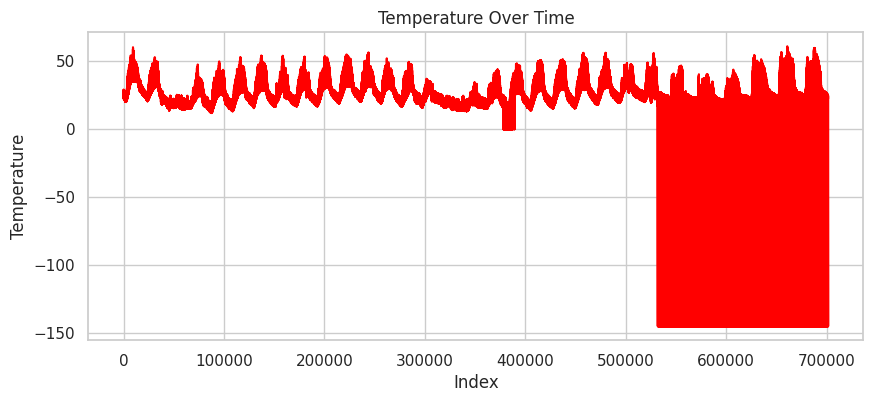

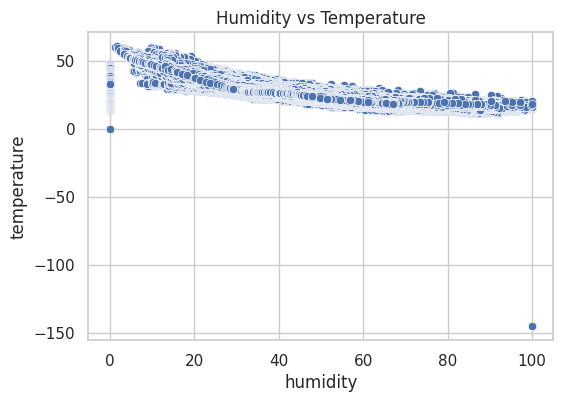

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
sns.set(style='whitegrid')

# Plot Temperature over time
plt.figure(figsize=(10, 4))
plt.plot(df['temperature'], color='red')
plt.title('Temperature Over Time')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.show()

# Plot Humidity vs Temperature
plt.figure(figsize=(6, 4))
sns.scatterplot(x='humidity', y='temperature', data=df)
plt.title('Humidity vs Temperature')
plt.show()


In [ ]:
# Feature
X = df[['humidity']]  # Features must be 2D

# Target
y = df['temperature']  # Target should be 1D


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
print("Scaled features sample:")
print(X_scaled[:5])

print("\nTarget sample:")
print(y.head())


Scaled features sample:
[[0.6248]
 [0.5946]
 [0.4438]
 [0.3828]
 [0.4637]]

Target sample:
0    23.46
1    23.06
2    26.53
3    28.34
4    26.31
Name: temperature, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,     # features
    y,            # target
    test_size=0.2,  # 20% for testing
    random_state=42 # ensures reproducibility
)

# Check the shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (561238, 1) (561238,)
Testing set shape: (140310, 1) (140310,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Squared Error (MSE): 144.08481646510748
Mean Absolute Error (MAE): 3.8748170683297234
R² Score: 0.2570441670365028


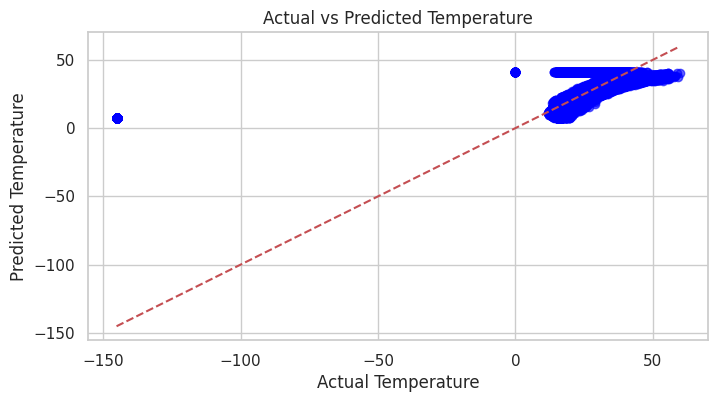

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)  # ✅ Training step



LinearRegression()

In [ ]:
import numpy as np

# Example: Predict temperature for 55% humidity
new_humidity = np.array([[55]])

# Scale it using the same scaler
new_humidity_scaled = scaler.transform(new_humidity)

# Predict temperature
predicted_temp = model.predict(new_humidity_scaled)

print(f"Predicted Temperature for 55% Humidity: {predicted_temp[0]:.2f}")


Predicted Temperature for 55% Humidity: 22.48


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

# Save model and scaler
joblib.dump(model, 'temperature_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
model = joblib.load('temperature_model.pkl')
scaler = joblib.load('scaler.pkl')


In [ ]:
humidity_value = float(input("Enter humidity value: "))
scaled_value = scaler.transform([[humidity_value]])
predicted_temp = model.predict(scaled_value)
print(f"Predicted Temperature: {predicted_temp[0]:.2f}°C")


Enter humidity value: 24
Predicted Temperature: 33.06°C


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Ask user to enter humidity percentage
humidity_percentage = float(input("Enter Humidity (%): "))

# Convert input to correct format and scale
import numpy as np
scaled_input = scaler.transform([[humidity_percentage]])  # Keep 2D shape

# Predict temperature using trained model
predicted_temp = model.predict(scaled_input)

# Display result
print(f"🌡️ Predicted Temperature for {humidity_percentage:.1f}% Humidity: {predicted_temp[0]:.2f} °C")


Enter Humidity (%): 90
🌡️ Predicted Temperature for 90.0% Humidity: 10.54 °C


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
from google.colab import files

# Download model and scaler
files.download('temperature_model.pkl')
files.download('scaler.pkl')

# Download your CSV again (if needed)
files.download('humidity.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>